In [402]:
# 任意选一个你喜欢的整数，这能帮你得到稳定的结果
seed = 999

# 欢迎来到线性回归项目

若项目中的题目有困难没完成也没关系，我们鼓励你带着问题提交项目，评审人会给予你诸多帮助。

所有选做题都可以不做，不影响项目通过。如果你做了，那么项目评审会帮你批改，也会因为选做部分做错而判定为不通过。

其中非代码题可以提交手写后扫描的 pdf 文件，或使用 Latex 在文档中直接回答。

# 1 矩阵运算

## 1.1 创建一个 4*4 的单位矩阵

In [28]:
# 这个项目设计来帮你熟悉 python list 和线性代数
# 你不能调用任何NumPy以及相关的科学计算库来完成作业


# 本项目要求矩阵统一使用二维列表表示，如下：
A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

#TODO 创建一个 4*4 单位矩阵
I = [[1,0,0,0],
     [0,1,0,0],
     [0,0,1,0],
     [0,0,0,1]]

## 1.2 返回矩阵的行数和列数

In [29]:
# TODO 返回矩阵的行数和列数
def shape(M):
    c = len(M[0])
    r = len(M)
    return r,c

In [35]:
# 运行以下代码测试你的 shape 函数
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## 1.3 每个元素四舍五入到特定小数数位

In [36]:
# TODO 每个元素四舍五入到特定小数数位
# 直接修改参数矩阵，无返回值
B = [[1.0001,2.0001,3.212,5], 
     [2,3,3,5], 
     [1,2,5,1]]
from decimal import *
def matxRound(M, decPts=4):
    for row in range(len(M)):
        for col in range(len(M[0])):
            M[row][col] = round(M[row][col],decPts)

In [37]:
# 运行以下代码测试你的 matxRound 函数
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.071s

OK


## 1.4 计算矩阵的转置

In [38]:
# TODO 计算矩阵的转置
def transpose(M):
    #利用*号操作符，可以列出解压成单独的序列 也就是把数组中相同的序列的元素组成一个元组，然后list转换元组
    return [list(col) for col in zip(*M)]

In [39]:
# 运行以下代码测试你的 transpose 函数
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.010s

OK


## 1.5 计算矩阵乘法 AB

In [40]:
# TODO 计算矩阵乘法 AB，如果无法相乘则raise ValueError
def matxMultiply(A, B):
    A_C = len(A[0])
    B_R = len(B)
        
    if A_C == B_R:
        #A * B
        return [[sum(a * b for a, b in zip(a, b)) for b in zip(*B)] for a in A]
    else:
        raise ValueError()

In [41]:
# 运行以下代码测试你的 matxMultiply 函数
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

.
----------------------------------------------------------------------
Ran 1 test in 0.061s

OK


---

# 2 Gaussign Jordan 消元法

## 2.1 构造增广矩阵

$ A = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n}\\
    a_{21}    & a_{22} & ... & a_{2n}\\
    a_{31}    & a_{22} & ... & a_{3n}\\
    ...    & ... & ... & ...\\
    a_{n1}    & a_{n2} & ... & a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$

返回 $ Ab = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n} & b_{1}\\
    a_{21}    & a_{22} & ... & a_{2n} & b_{2}\\
    a_{31}    & a_{22} & ... & a_{3n} & b_{3}\\
    ...    & ... & ... & ...& ...\\
    a_{n1}    & a_{n2} & ... & a_{nn} & b_{n} \end{bmatrix}$

In [42]:
# TODO 构造增广矩阵，假设A，b行数相同
def augmentMatrix(A, b):
    B =[[A[j][i] for i in range(len(A[0]))] for j in range(len(A))]
    for item ,x in enumerate(B):
        x.append(b[item][0])
    return B

In [43]:
# 运行以下代码测试你的 augmentMatrix 函数
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.008s

OK


## 2.2 初等行变换
- 交换两行
- 把某行乘以一个非零常数
- 把某行加上另一行的若干倍：

In [44]:
# TODO r1 <---> r2
# 直接修改参数矩阵，无返回值
def swapRows(M, r1, r2):
    M[r1],M[r2] = M[r2],M[r1]

In [45]:
# 运行以下代码测试你的 swapRows 函数
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [46]:
# TODO r1 <--- r1 * scale
# scale为0是非法输入，要求 raise ValueError
# 直接修改参数矩阵，无返回值
def scaleRow(M, r, scale):
    if scale != 0:
        M[r] = [scale * x for x in M[r]]
    else:
        raise ValueError("scale is zero")

In [47]:
# 运行以下代码测试你的 scaleRow 函数
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [48]:
# TODO r1 <--- r1 + r2*scale
# 直接修改参数矩阵，无返回值
def addScaledRow(M, r1, r2, scale):
    M[r1] = [x + (y *scale) for x,y in zip(M[r1],M[r2])]

In [49]:
# 运行以下代码测试你的 addScaledRow 函数
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


## 2.3  Gaussian Jordan 消元法求解 Ax = b

### 2.3.1 算法

步骤1 检查A，b是否行数相同

步骤2 构造增广矩阵Ab

步骤3 逐列转换Ab为化简行阶梯形矩阵 [中文维基链接](https://zh.wikipedia.org/wiki/%E9%98%B6%E6%A2%AF%E5%BD%A2%E7%9F%A9%E9%98%B5#.E5.8C.96.E7.AE.80.E5.90.8E.E7.9A.84-.7Bzh-hans:.E8.A1.8C.3B_zh-hant:.E5.88.97.3B.7D-.E9.98.B6.E6.A2.AF.E5.BD.A2.E7.9F.A9.E9.98.B5)
    
    对于Ab的每一列（最后一列除外）
        当前列为列c
        寻找列c中 对角线以及对角线以下所有元素（行 c~N）的绝对值的最大值
        如果绝对值最大值为0
            那么A为奇异矩阵，返回None (你可以在选做问题2.4中证明为什么这里A一定是奇异矩阵)
        否则
            使用第一个行变换，将绝对值最大值所在行交换到对角线元素所在行（行c） 
            使用第二个行变换，将列c的对角线元素缩放为1
            多次使用第三个行变换，将列c的其他元素消为0
            
步骤4 返回Ab的最后一列

**注：** 我们并没有按照常规方法先把矩阵转化为行阶梯形矩阵，再转换为化简行阶梯形矩阵，而是一步到位。如果你熟悉常规方法的话，可以思考一下两者的等价性。

### 2.3.2 算法推演

为了充分了解Gaussian Jordan消元法的计算流程，请根据Gaussian Jordan消元法，分别手动推演矩阵A为奇异矩阵，矩阵A为非奇异矩阵两种情况。

In [432]:
# 不要修改这里！
from helper import *
A = generateMatrix(4,seed,singular=False)
b = np.ones(shape=(4,1)) # it doesn't matter
Ab = augmentMatrix(A.tolist(),b.tolist()) # please make sure you already correct implement augmentMatrix
printInMatrixFormat(Ab,padding=4,truncating=0)

 -10,  -5,  -9,  -2 || 1   
  -9,   9,   6,   3 || 1   
  -2,  -2,   6,  -5 || 1   
  -8,   1,   1,  -6 || 1   


请按照算法的步骤3，逐步推演***可逆矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵。

要求：
1. 做分数运算
2. 使用`\frac{n}{m}`来渲染分数，如下：
 - $\frac{n}{m}$
 - $-\frac{a}{b}$

增广矩阵
$ Ab = \begin{bmatrix}
    1 & \frac{1}{2} & \frac{9}{10} & \frac{1}{5} & -\frac{1}{10}\\
    0 & \frac{27}{2} & \frac{141}{10} & \frac{24}{5} & \frac{1}{10}\\
    0 & -1 & \frac{78}{10} & -\frac{13}{5} & \frac{8}{10}\\
    0 & 5 & \frac{82}{10} & -\frac{24}{5} &\frac{2}{10}\end{bmatrix}$

$ --> \begin{bmatrix}
    1 & 0 & \frac{75}{270} & \frac{1}{45} & -\frac{28}{270}\\
    0 & 1 & \frac{141}{135} & \frac{16}{45} & \frac{1}{135}\\
    0 & 0 & \frac{1194}{135} & -\frac{85}{45} & \frac{109}{135}\\
    0 & 0 & \frac{402}{135} & -\frac{296}{45} & \frac{22}{135}\end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & 0 & \frac{776}{179910} & -\frac{44674}{161190}\\
    0 & 1 & 0 & \frac{478881}{179910} & -\frac{67509}{161190}\\
    0 & 0 & 1 & -\frac{85}{389} & -\frac{478881}{80595}\\
    0 & 0 & 0 & -\frac{478881}{80595} & \frac{43796}{161190}\end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & 0 & 0 & -\frac{672367271}{3472687322550}\\
    0 & 1 & 0 & 0 & \frac{11133455}{3472687322550}\\
    0 & 0 & 1 & 0 & \frac{7741001198}{307219496992200}\\
    0 & 0 & 0 & 1 & -\frac{3529738620}{77170829390}\end{bmatrix}$
    
$...$

In [439]:
# 不要修改这里！
A = generateMatrix(4,seed,singular=True)
b = np.ones(shape=(4,1)) # it doesn't matter
Ab = augmentMatrix(A.tolist(),b.tolist()) # please make sure you already correct implement augmentMatrix
printInMatrixFormat(Ab,padding=4,truncating=0)

  -1,  -6,  -4,   7 || 1   
   8,   3,   7,   9 || 1   
   1,  -8,   9,   3 || 1   
   5,   6,  -5,   9 || 1   


# 请按照算法的步骤3，逐步推演***奇异矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵。

要求：
1. 做分数运算
2. 使用`\frac{n}{m}`来渲染分数，如下：
 - $\frac{n}{m}$
 - $-\frac{a}{b}$

增广矩阵
$ Ab = \begin{bmatrix}
    1 & \frac{3}{8}& \frac{7}{8} & \frac{9}{8} & \frac{1}{8}\\
    0 & -\frac{45}{8}& -\frac{25}{8} & \frac{65}{8} & \frac{9}{8}\\
    0 & -\frac{67}{8} & \frac{65}{8} & \frac{15}{8} & \frac{7}{8}\\
    0 & \frac{33}{8} & -\frac{75}{8} & -\frac{27}{8} & \frac{3}{8}\end{bmatrix}$

$ --> \begin{bmatrix}
    1 & 0 & \frac{202}{536} & \frac{54}{536} & \frac{28}{536}\\
    0 & 1 & -\frac{65}{67} & -\frac{15}{67} & -\frac{7}{67}\\
    0 & 0 & -\frac{2950}{536} & \frac{610}{536} & -\frac{306}{536}\\
    0 & 0 & \frac{2070}{536} & \frac{522}{536} & \frac{234}{536}\end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & 0 & 0 & 0\\
    0 & 1 & 0 & 0 & 0\\
    0 & 0 & 1 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\end{bmatrix}$

$ --> \begin{bmatrix}
    1 & 0 & 0 & 0 & \frac{5650}{23600}\\
    0 & 1 & 0 & 0 &  -\frac{4410}{197650}\\
    0 & 0 & 1 & -\frac{610}{2950} & \frac{306}{2950}\\
    0 & 0 & 0 & 0 & 0\end{bmatrix}$

### 2.3.3 实现 Gaussian Jordan 消元法

In [81]:
# TODO 实现 Gaussain Jordan 方法求解 Ax = b

""" Gaussian Jordan 方法求解 Ax = b.
    参数
        A: 方阵 
        b: 列向量
        decPts: 四舍五入位数，默认为4
        epsilon: 判读是否为0的阈值，默认 1.0e-16
        
    返回列向量 x 使得 Ax = b 
    返回None，如果 A，b 高度不同
    返回None，如果 A 为奇异矩阵
"""

def gj_Solve(A, b, decPts=4, epsilon = 1.0e-16):
    
    num_equations = len(A)
    
    if num_equations == len(b):
        augmented_matrix = augmentMatrix(A,b)
        
        for  i in range(num_equations):
            #最大值所在的行
            max_value_list = [abs(augmented_matrix[x][i]) for x in range(len(augmented_matrix)) if x >= i]
            max_values_in_row = max_value_list.index(max(max_value_list)) + i
            if max(max_value_list) < epsilon:
                return None
            else:
                if i != max_values_in_row:
                    swapRows(augmented_matrix,i,max_values_in_row)
                    
                augmented_matrix[i] = [float(need_scale_num)/augmented_matrix[i][i] 
                                           for need_scale_num in augmented_matrix[i]]
                
                for j in range(i+1,num_equations):
                    addScaledRow(augmented_matrix,j,i,-augmented_matrix[j][i])
                for z in range(i)[::-1]:
                    addScaledRow(augmented_matrix,z,i,-augmented_matrix[z][i]) 
        return  [[x[num_equations]] for x in augmented_matrix]
    else:
        return None

In [95]:
# 运行以下代码测试你的 gj_Solve 函数
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve

.
----------------------------------------------------------------------
Ran 1 test in 2.627s

OK


## (选做) 2.4 算法正确判断了奇异矩阵：

在算法的步骤3 中，如果发现某一列对角线和对角线以下所有元素都为0，那么则断定这个矩阵为奇异矩阵。

我们用正式的语言描述这个命题，并证明为真。

证明下面的命题：

**如果方阵 A 可以被分为4个部分: ** 

$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix} , \text{其中 I 为单位矩阵，Z 为全0矩阵，Y 的第一列全0}$，

**那么A为奇异矩阵。**

提示：从多种角度都可以完成证明
- 考虑矩阵 Y 和 矩阵 A 的秩
- 考虑矩阵 Y 和 矩阵 A 的行列式
- 考虑矩阵 A 的某一列是其他列的线性组合

TODO 证明：


# 3  线性回归

## 3.1 随机生成样本点

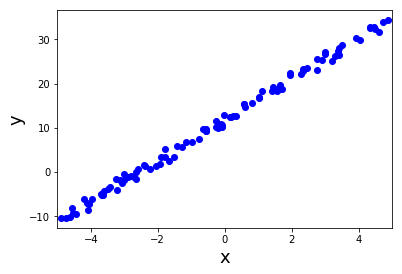

In [238]:
# 不要修改这里！
from helper import generatePoints
from matplotlib import pyplot as plt

X,Y = generatePoints(num=100)
## 可视化
plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')
plt.show()

## 3.2 拟合一条直线

### 3.2.1 猜测一条直线

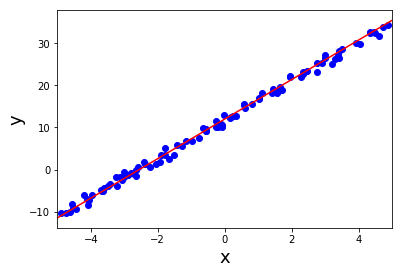

In [246]:
#TODO 请选择最适合的直线 y = kx + b
k = 4.7

b = 12



# 不要修改这里！
plt.xlim((-5,5))
x_vals = plt.axes().get_xlim()
y_vals = [k*x+b for x in x_vals]
plt.plot(x_vals, y_vals, 'r-')

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')

plt.show()

### 3.2.2 计算平均平方误差 (MSE)

我们要编程计算所选直线的平均平方误差(MSE), 即数据集中每个点到直线的Y方向距离的平方的平均数，表达式如下：
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

In [247]:
# TODO 实现以下函数并输出所选直线的MSE

def calculateMSE(X,Y,m,b):
    #求所有点到直线y方向上的距离的平方的平均值（y1-mx1 - b）^2+.....+(yn-mxn - b)^2/n
    all_sum = sum([(y - (m * x) - b)**2 for x,y in zip(X,Y)])/len(X)
    return  all_sum

print(calculateMSE(X,Y,k,b))

0.710907467208


### 3.2.3 调整参数 $m, b$ 来获得最小的平方平均误差

你可以调整3.2.1中的参数 $m,b$ 让蓝点均匀覆盖在红线周围，然后微调 $m, b$ 让MSE最小。

## 3.3 (选做) 找到参数 $m, b$ 使得平方平均误差最小

**这一部分需要简单的微积分知识(  $ (x^2)' = 2x $ )。因为这是一个线性代数项目，所以设为选做。**

刚刚我们手动调节参数，尝试找到最小的平方平均误差。下面我们要精确得求解 $m, b$ 使得平方平均误差最小。

定义目标函数 $E$ 为
$$
E = \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

因为 $E = \frac{n}{2}MSE$, 所以 $E$ 取到最小值时，$MSE$ 也取到最小值。要找到 $E$ 的最小值，即要找到 $m, b$ 使得 $E$ 相对于 $m$, $E$ 相对于 $b$ 的偏导数等于0. 

因此我们要解下面的方程组。

$$
\begin{cases}
\displaystyle
\frac{\partial E}{\partial m} =0 \\
\\
\displaystyle
\frac{\partial E}{\partial b} =0 \\
\end{cases}
$$

### 3.3.1 计算目标函数相对于参数的导数
首先我们计算两个式子左边的值

证明/计算：
$$
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-(y_i - mx_i - b)}
$$

TODO 证明:

$$
E = \frac{1}{2}\\((y_1 - mx_1 - b)^2 + (y_1 - mx_1 - b)^2 + ... + (y_n - mx_n - b)^2 )
$$

$$
\frac{\partial E}{\partial m} = \frac{1}{2}\\(-2x_1(y_1 - mx_1 - b) -2x_2(y_2 - mx_2 - b) + .... -2x_n(y_n - mx_n - b))
$$

$$
\frac{\partial E}{\partial m} = -x_1(y_1 - mx_1 - b) -x_2(y_2 - mx_2 - b) + .... -x_n(y_n - mx_n - b) = \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}
$$


$$
\frac{\partial E}{\partial b} = \frac{1}{2}\\(-2(y_1 - mx_1 - b) -2(y_2 - mx_2 - b) + .... -2(y_n - mx_n - b))
$$

$$
\frac{\partial E}{\partial b} = -(y_1 - mx_1 - b) -(y_2 - mx_2 - b) + .... -(y_n - mx_n - b) = \sum_{i=1}^{n}{-(y_i - mx_i - b)}
$$

### 3.3.2 实例推演

现在我们有了一个二元二次方程组

$$
\begin{cases}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} =0 \\
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} =0 \\
\end{cases}
$$

为了加强理解，我们用一个实际例子演练。

我们要用三个点 $(1,1), (2,2), (3,2)$ 来拟合一条直线 y = m*x + b, 请写出

- 目标函数 $E$, 
- 二元二次方程组，
- 并求解最优参数 $m, b$

TODO 写出目标函数，方程组和最优参数


$$
E = \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

根据

$$
\begin{cases}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} =0 \\
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} =0 \\
\end{cases}
$$可以求出m和b

已知点$(1,1), (2,2), (3,2)$，第三个点带入到两个方程可以求出$m$和$b$

$$
\begin{cases}
\displaystyle
\\14m + 6b =11 \\
\\
\displaystyle
\\6m + 3b =5 \\
\end{cases}
$$

所以最优参数$m = 0.5$,$b = 0.67$

### 3.3.3 将方程组写成矩阵形式

我们的二元二次方程组可以用更简洁的矩阵形式表达，将方程组写成矩阵形式更有利于我们使用 Gaussian Jordan 消元法求解。

请证明 
$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = X^TXh - X^TY
$$

其中向量 $Y$, 矩阵 $X$ 和 向量 $h$ 分别为 :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

TODO 证明:

因为
$$
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix}
,
X^T = \begin{bmatrix}
    x_1 & x_2 & ....& x_n \\
    1 & 1 & ....& 1\\
\end{bmatrix}
$$

$$
X^TXh = \begin{bmatrix}
    \sum_{i=1}^{n}{x_i^2} + \sum_{i=1}^{n}{bx_i} \\
    \sum_{i=1}^{n}{mx_i} + nb \\
\end{bmatrix}
$$

$$
X^TY = \begin{bmatrix}
    \sum_{i=1}^{n}{x_iy_i} \\
    \sum_{i=1}^{n}{y_i} \\
\end{bmatrix}
$$

$$
X^TXh - X^TY = \begin{bmatrix}
    \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} \\
    \sum_{i=1}^{n}{-(y_i - mx_i - b)} \\
\end{bmatrix}
$$

由上面的结论知道：
$$
\begin{cases}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} =0 \\
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} =0 \\
\end{cases}
$$

所以可以得出


$$
X^TXh - X^TY = 
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix}
$$


至此我们知道，通过求解方程 $X^TXh = X^TY$ 来找到最优参数。这个方程十分重要，他有一个名字叫做 **Normal Equation**，也有直观的几何意义。你可以在 [子空间投影](http://open.163.com/movie/2010/11/J/U/M6V0BQC4M_M6V2AJLJU.html) 和 [投影矩阵与最小二乘](http://open.163.com/movie/2010/11/P/U/M6V0BQC4M_M6V2AOJPU.html) 看到更多关于这个方程的内容。

### 3.4 求解 $X^TXh = X^TY$ 

在3.3 中，我们知道线性回归问题等价于求解 $X^TXh = X^TY$ (如果你选择不做3.3，就勇敢的相信吧，哈哈)

In [272]:
# TODO 实现线性回归
'''
参数：X, Y
返回：m，b
'''
def linearRegression(X,Y):
    #先构建一个X矩阵
    augmented_martix = [[x,1] for x in X]
    new_Y = [[y] for y in Y]
    transpose_augmented = transpose(augmented_martix)
    new_martix = matxMultiply(transpose_augmented,augmented_martix)
    constant_martix =  matxMultiply(transpose_augmented,new_Y)

    a = gj_Solve(new_martix,constant_martix)
    return  a[0],a[1]
m,b = linearRegression(X,Y)
print(m,b)

([4.6059], [11.869])


你求得的回归结果是什么？它足够好了吗？请使用运行以下代码将它画出来。

请老师指导一下，下面的y不知道是哪一个？需要自己根据m和b来构造么？

In [274]:
# 请不要修改下面的代码
x1,x2 = -5,5
y1,y2 = x1*m+b, x2*m+b

plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(x,y,c='b')
plt.plot((x1,x2),(y1,y2),'r')
plt.text(1,2,'y = {m}x + {b}'.format(m=m,b=b))
plt.show()